Nama: Nabilah Qurratul Annisa

NPM : 2108107010010

# Jenis Dataset
Dataset ini bersumber dari kaggle.
https://www.kaggle.com/datasets/aparnashankar/facebook-ads-dataset

Pada dataset ini terdapat beberapa atribut yaitu:

*   Names of people
*   Time spent on the site
*   Emails
*   Country
*   Salary
*   Clicked

# Studi Kasus

Model ini dibangun untuk memprediksi kemungkinan pengguna mengklik iklan facebook berdasarkan TSOS dan Salary mereka.


# Import Library dan Membaca Dataset

In [26]:
# Mengimport library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Membaca data CSV dengan pengkodean ISO-8859-1
data = pd.read_csv('Facebook_Ads.csv', encoding='ISO-8859-1')

# Menampilkan data
print(data)

               Names                                             emails  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
494            Rigel            egestas.blandit.Nam@semvitaealiquam.com   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   

                   Country  Time Spent on Site       Salary  Clicked  
0                 Bulgaria  

# Preprocessing Data

In [28]:
# Melihat tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [29]:
# Mengecek missing value
data.isna().sum()

Names                 0
emails                0
Country               0
Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

In [30]:
# Mengecek nilai duplikat
print(data.duplicated().sum())

0


In [31]:
data.corr()

<ipython-input-31-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Time Spent on Site,Salary,Clicked
Time Spent on Site,1.000000,0.388330,0.650781
Salary,0.388330,1.000000,0.654654
Clicked,0.650781,0.654654,1.000000


<ipython-input-32-7cf4e9731fe4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Reds')


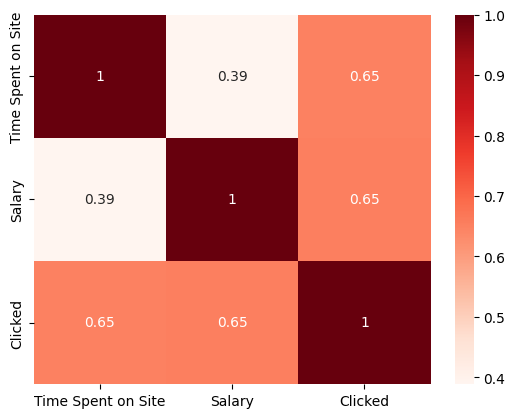

In [32]:
# Menampilkan korelasi
import matplotlib.pyplot as plt
sns.heatmap(data.corr(), annot=True, cmap='Reds')
plt.show()

In [33]:
# Menghilangkan kolom-kolom tertentu yang tidak diperlukan
data.drop(columns=['Names','emails', 'Country'], inplace=True)

In [34]:
# Menampilkan kolom setelah dihapus
data

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


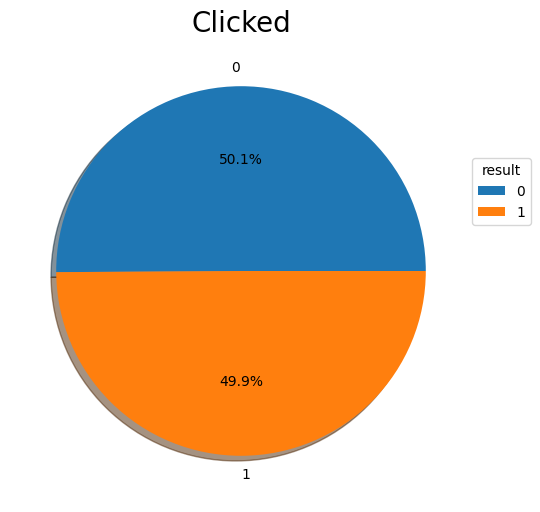

In [35]:
plt.figure(figsize=(8,6))

# Membuat pie chart
r=data['Clicked'].value_counts().values
label = ['0','1']
plt.pie(r,labels=label,shadow=True,autopct='%2.1f%%',explode=[0,0])
plt.legend(title='result',loc=(1,0.6))
plt.title('Clicked',fontsize=20)
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initialize the StandardScaler
scaler = StandardScaler()

# Select features and target variable
X = data[['Time Spent on Site', 'Salary',]]
y = data['Clicked']

In [37]:
# Import the support vector classifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create a support vector classifier
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)
print("Classification report for - \n{}:\n{}\n".format(svc, classification_report(y_test, y_pred)))

Classification report for - 
SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        61
           1       0.87      0.86      0.87        64

    accuracy                           0.86       125
   macro avg       0.86      0.86      0.86       125
weighted avg       0.86      0.86      0.86       125




In [38]:
X

,Time Spent on Site,Salary
0,25.649648,55330.06006
1,32.456107,79049.07674
2,20.945978,41098.60826
3,54.039325,37143.35536
4,34.249729,37355.11276
...,...,...
494,19.222746,44969.13495
495,22.665662,41686.20425
496,35.320239,23989.80864
497,26.539170,31708.57054


# Split Dataset

In [39]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [40]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Membangun Model

In [41]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(random_state=0) # for non-linear model use this parametre kernel='rbf'
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [42]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Model Non Linear Kernel

<ipython-input-44-2fece6d81242>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


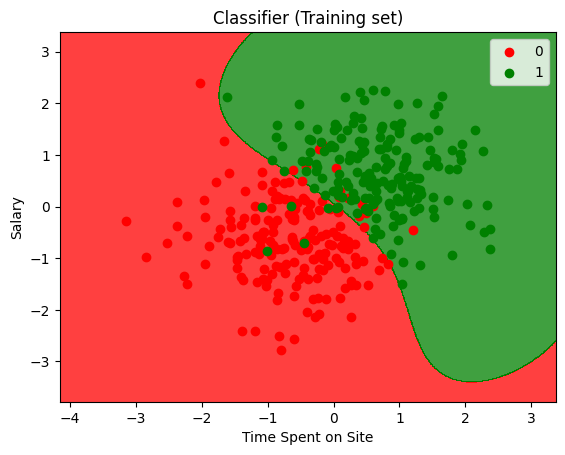

In [44]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Visualisasi Model Linear Kernel

In [45]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)  # Ubah kernel menjadi 'linear'
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [46]:
# Predicting the Test set results (no changes needed)
y_pred = classifier.predict(X_test)

In [47]:
# Making the Confusion Matrix (no changes needed)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<ipython-input-48-7bb8b531f455>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


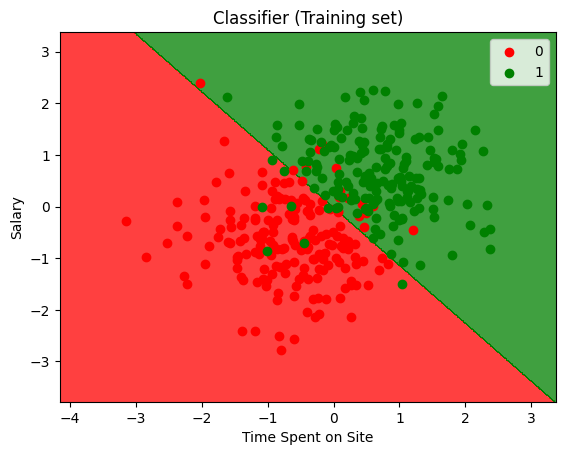

In [48]:
# Visualising the Training set results (changes here)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Assuming your classifier is still using the linear kernel
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Salary')
plt.legend()
plt.show()

**Kesimpulan**

Terlihat hubungan positif antara TSOS dan Clicked. Hal ini berarti bahwa semakin banyak waktu yang dihabiskan pengguna di situs web, semakin besar kemungkinan mereka untuk mengklik sesuatu. Hasil scatter plot menunjukkan bahwa TSOS lebih berpengaruh pada Clicked dibandingkan Salary. Pengguna yang menghabiskan lebih banyak waktu di situs web lebih cenderung mengklik sesuatu, terlepas dari gaji mereka.